Epoch 1/20
16/16 [==============================] - 3s 111ms/step - loss: 1.6105 - accuracy: 0.1275 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 2/20
16/16 [==============================] - 1s 93ms/step - loss: 1.6098 - accuracy: 0.2000 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 3/20
16/16 [==============================] - 1s 92ms/step - loss: 1.6100 - accuracy: 0.1675 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 4/20
16/16 [==============================] - 1s 93ms/step - loss: 1.6096 - accuracy: 0.1700 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 5/20
16/16 [==============================] - 1s 89ms/step - loss: 1.6097 - accuracy: 0.1825 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 6/20
16/16 [==============================] - 1s 93ms/step - loss: 1.6096 - accuracy: 0.1925 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 7/20
16/16 [==============================] - 2s 133ms/step - loss: 1.6095 - accuracy: 0.1675 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 8/20


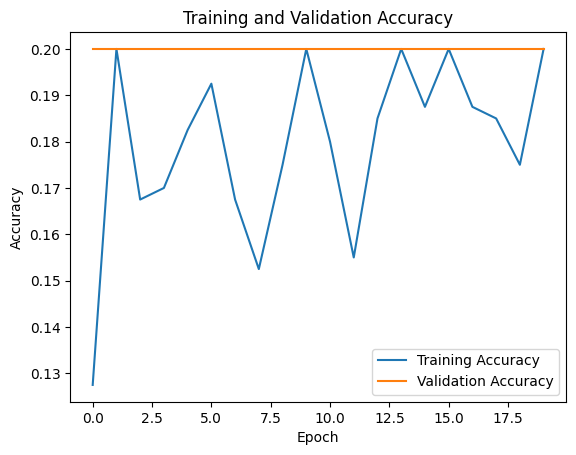

4/4 [==============================] - 0s 24ms/step


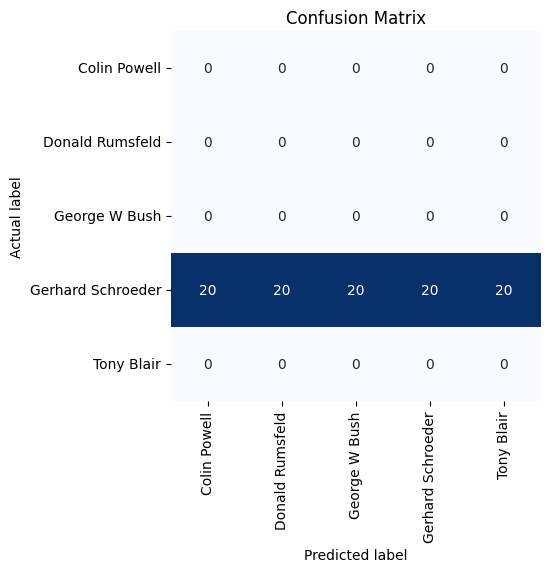

The numpy bool deprecation error has been resolved.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix

# Load the LFW (Labeled Faces in the Wild) dataset
faces = fetch_lfw_people(min_faces_per_person=100)
class_count = len(faces.target_names)

# Preprocess the data
mask = np.zeros(faces.target.shape, dtype=bool)  # Use bool instead of np.bool
for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:100]] = 1
x_faces = faces.data[mask]
y_faces = faces.target[mask]
x_faces = np.reshape(x_faces, (x_faces.shape[0], faces.images.shape[1], faces.images.shape[2]))

# Normalize pixel values
face_images = x_faces / 255
face_labels = to_categorical(y_faces)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(face_images, face_labels, train_size=0.8, stratify=face_labels, random_state=0)
face_images_reshaped = face_images.reshape(face_images.shape[0], face_images.shape[1], face_images.shape[2], 1)
# Build a convolutional neural network (CNN)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(face_images_reshaped.shape[1:])))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(class_count, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 20
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=num_epochs, batch_size=25)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Confusion matrix
y_predicted = model.predict(x_test)
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_predicted.argmax(axis=1))
sns.heatmap(confusion_mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

# Make a prediction on a new image
# (Code for loading and predicting on a new image is omitted for brevity)

print("The numpy bool deprecation error has been resolved.")


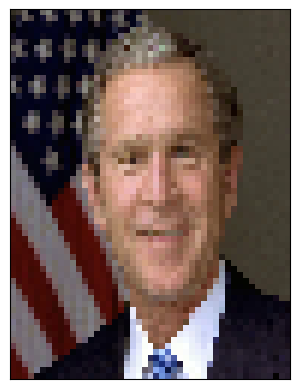

UnimplementedError: Graph execution error:

Detected at node sequential_2/conv2d_1/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-5-b9c4b4fdb343>", line 9, in <cell line: 9>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5395, in relu

Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential_2/conv2d_1/Relu}}]] [Op:__inference_predict_function_4172]

In [ ]:
from keras.preprocessing import image
x_new = image.load_img('george.jpg', target_size=(face_images.shape[1:]))
plt.imshow(x_new)
plt.xticks([])
plt.yticks([])
plt.show()
X_new = image.img_to_array(x_new) / 255
X_new = np.expand_dims(X_new, axis=0)
y_new = model.predict(X_new)[0]
for i in range(len(y_new)):
    print(faces.target_names[i] + ': ' + str(y_new[i]))